<a href="https://colab.research.google.com/github/ShoLee01/ws6b_tf_201822206_201923816_201414715_201910015_201715721_201710880/blob/main/Trabajo%20de%20Dijkstra%20Hito%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

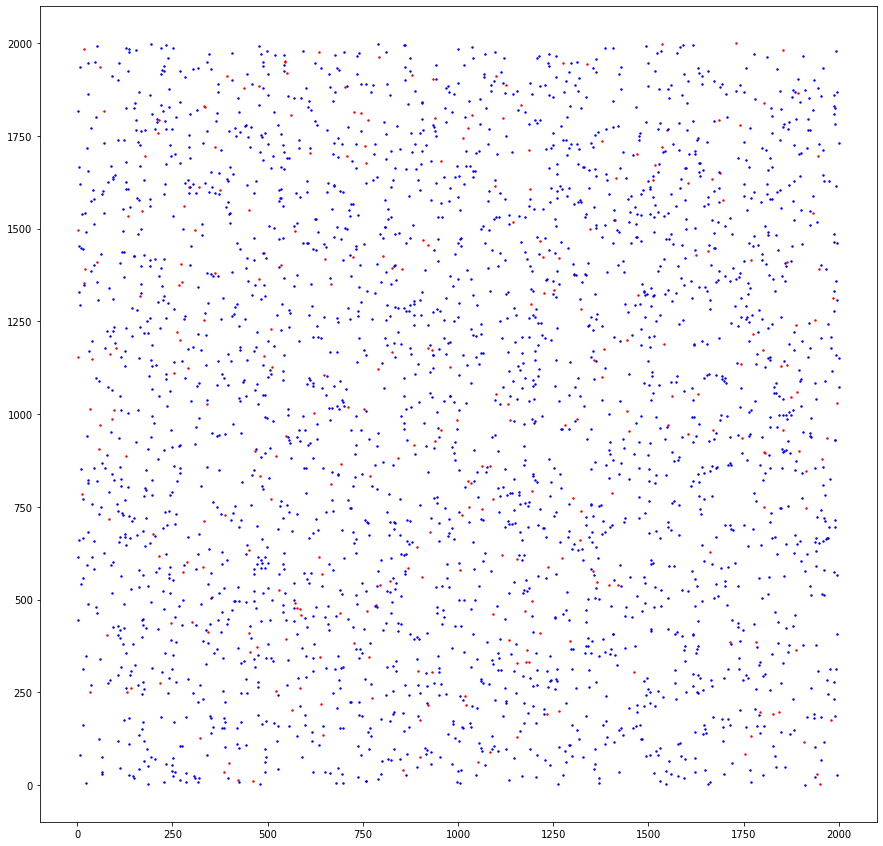

In [75]:
#Representación del grafo general
import csv
import numpy as np
import matplotlib.pyplot as plt
def spell_csv(headers, fields, filename):
  with open(filename, 'w') as f:   
    write = csv.writer(f)
    if headers != None: write.writerow(headers)
    write.writerows(fields)
def interpret_csv(filename):
  csv_file = list()
  with open(filename) as File:
    reader = csv.reader(File, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        if row[0] != 'x':
          row[0], row[1] = int(row[0]), int(row[1])
          csv_file.append(row)
  csv_file.sort(key = lambda x: (x[0], x[1]))
  return csv_file
warehouse = interpret_csv("almacenes.csv")
Home = interpret_csv("puntos_entrega.csv")
x, y = np.array(warehouse).T
x2, y2 = np.array(Home).T
plt.figure(figsize=(15, 15))
plt.scatter(x,y, 2, c="red")
plt.scatter(x2,y2, 2, c="blue")
plt.show()
for i, _ in enumerate(warehouse):
  warehouse[i].append("W")
for i, _ in enumerate(Home):
  Home[i].append("H")
city = list()
city.extend(warehouse)
city.extend(Home)
city.sort(key = lambda x: (x[0], x[1]))
graph = [[] for _ in city]
for i, _ in enumerate(city):
  for j, _ in enumerate(city):
    if i == j: continue
    if city[i][0] == city[j][0] or city[i][1] == city[j][1]: graph[i].append(j)
spell_csv(['x', 'y', 'type'], city, 'town.csv')
spell_csv(None, graph, 'graph.csv')

In [76]:
!git clone https://github.com/Dinoelfantastico/librarys.git 2>/dev/null

In [77]:
from librarys.Carpeta import Draw as ds
from librarys.Carpeta import Grafo as gs

[[6, 1], [7, 2, 0], [8, 3, 1], [9, 4, 2], [10, 5, 3], [11, 4], [12, 0, 7], [13, 1, 8, 6], [14, 2, 9, 7], [15, 3, 10, 8], [16, 4, 11, 9], [17, 5, 10], [18, 6, 13], [19, 7, 14, 12], [20, 8, 15, 13], [21, 9, 16, 14], [22, 10, 17, 15], [23, 11, 16], [24, 12, 19], [25, 13, 20, 18], [26, 14, 21, 19], [27, 15, 22, 20], [28, 16, 23, 21], [29, 17, 22], [30, 18, 25], [31, 19, 26, 24], [32, 20, 27, 25], [33, 21, 28, 26], [34, 22, 29, 27], [35, 23, 28], [24, 31], [25, 32, 30], [26, 33, 31], [27, 34, 32], [28, 35, 33], [29, 34]]
['E', 'A', 'Null', 'A', 'Null', 'Null', 'E', 'E', 'A', 'Null', 'Null', 'Null', 'Null', 'E', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null', 'Null']
[[(6, 6), (1, 1)], [(7, 6), (2, 1), (0, 1)], [(8, 6), (3, 1), (1, 1)], [(9, 6), (4, 1), (2, 1)], [(10, 6), (5, 1), (3, 1)], [(11, 6), (4, 1)], [(12, 6), (0, 6), (7, 1)], [(13, 6), (1, 6), (8, 1), (6, 1)], [(14,

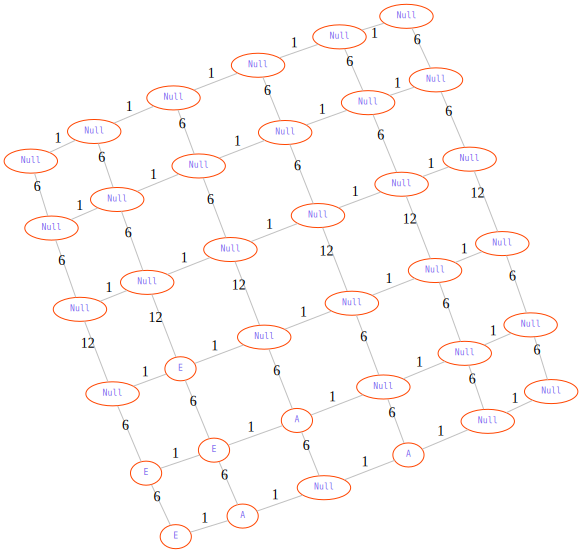

In [78]:
#Puebas
almacenes = [[0,1],[1,2],[0,0],[1,0],[0,3]]
entregas = [[1,0],[1,1],[0,0],[2,1]]

size = 6

GRAFOO = gs.setEmptyGraph(size)
print(GRAFOO)

labels =  gs.setKnownPoints(size,almacenes,entregas)
print(labels)

G = gs.getGraphWeighted(GRAFOO)
print(G)

ds.adjlShow(G,labels=labels,weighted=True)

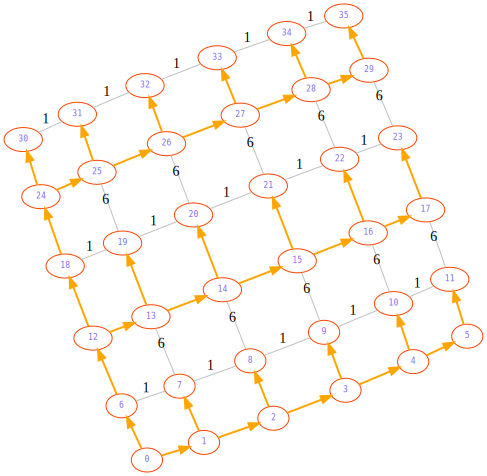

In [79]:
#Implementación del algoritmo de dijkstra

import heapq as hp

def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(s, 0)]
  while queue:
    _,u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v,w in G[u]:
        f = w + 1
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (v, f))

  return path, cost

ds.adjlShow(G,path=path,weighted=True)

In [80]:
#Entregas
almacenes = [[0,1],[1,2]]
entregas = [[1,0],[1,1]]

In [81]:
#Generando para cada punto de entrega

def Posicion(x, y, n):
  return x + y*n;

def adjacents(x, y, n):
  dir = []
  coords = [[x, y-1],[x-1, y],[x+1, y],[x, y+1]]
  for c in coords:
    if c[0] != -1 and c[0] != n and c[1] != -1 and c[1] != n:
      dir.append(toPosition(c[0], c[1], n))
  return dir

In [82]:
def g(s, p,n):
  l = []
  ll = []
  for a in range(n):
    for b in range(n): 
      p = 0      
      if [b,a] in s:
        p = 1        
      if [b,a] in p:
        p = 2
      l.append(adjacents(a, b, n))
      ll.append(p)
  return l, ll